## Introduction

Predicting Customer Lifetime Value (CLV) is an essential exercise for e-commerce businesses aiming to evaluate the total revenue a company can expect from a single customer account. My project aims to construct a predictive model for CLV that encapsulates and forecasts the net profit attributed to the entire prospective relationship with customers. Such a model is vital for optimizing marketing strategies, focusing on customer retention, and effectively allocating resources towards the most promising customer segments.

### Dataset and Preliminary Examination

For this endeavor, I utilize the "Online Retail II" dataset from the UCI Machine Learning Repository. This dataset details transaction records from a UK-based online retailer from December 2009 to December 2011, offering a comprehensive overview of customer transactions, including Customer IDs, Invoice Numbers, Stock Codes, Descriptions, and more. It's an exemplary foundation for understanding customer purchasing patterns and modeling CLV.

### Problem Significance

The significance of accurately predicting CLV extends beyond numerical assessments—it is fundamentally a strategic tool in the competitive e-commerce sector. It enables the identification of high-value customers and informs strategies for targeted marketing, customer engagement, and business growth, ultimately enhancing the return on marketing investments.

### Modeling Approach and Hypotheses

Guided by initial hypotheses formed from an understanding of the dataset and the nature of CLV, I propose:

1. A direct correlation between the frequency of purchases and higher CLV.

2. A strong link between the total amount spent by customers and their CLV, with high spenders likely exhibiting higher lifetime values.

3. Influences from seasonal trends and product categories on customer spending patterns, potentially impacting their CLV.

These hypotheses guide the exploratory data analysis and initial modeling phases. I start with a simple Linear Regression model, advancing to more sophisticated algorithms such as Decision Trees, Random Forests, Gradient Boosting, and Neural Networks (Multilayer Perceptrons). Each model is rigorously evaluated for its accuracy in predicting CLV, with insights extracted to continuously refine the predictive capability.

### Conclusion and Forward-Look

The ultimate goal of my project is to offer a data-driven, accurate CLV prediction model that can serve as a decision-making aid for e-commerce businesses. By understanding customer value, I aim to steer marketing strategies and customer relationship management towards more profitable horizons. As market conditions evolve and additional data is captured, I plan to iteratively enhance the model, maintaining its relevance and precision in a dynamic business landscape.

## Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel('online_retail_II.xlsx', engine='openpyxl') #Loading the dataset

In [2]:
data.describe(include='all')  #printing the dataset

/var/folders/zz/ppxlg0r979xchrbqmw39r5w40000gn/T/ipykernel_11102/204164137.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')  #printing the dataset


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,525461.0,525461,522533,525461.000000,525461,525461.000000,417534.000000,525461
unique,28816.0,4632,4681,NaN,25296,NaN,NaN,40
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,675.0,3516,3549,NaN,675,NaN,NaN,485852
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2010-12-09 20:01:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.337667,NaN,4.688834,15360.645478,NaN
std,NaN,NaN,NaN,107.424110,NaN,146.126914,1680.811316,NaN
min,NaN,NaN,NaN,-9600.000000,NaN,-53594.360000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13983.000000,NaN


In [3]:
dataset_structure = data.info() #printing important infos about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
missing_values = data.isnull().sum() #Identifying missing values
print(missing_values)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [5]:
# Remove rows with missing descriptions
data_cleaned = data.dropna(subset=['Description'])
# Replace missing customer IDs with a placeholder
data_cleaned = data.dropna(subset=['Customer ID'])

In [6]:
#saving the cleaned file as CSV to make it easy to use
data_cleaned.to_csv('cleaned_online_retail_II.csv', index=False) 

In [7]:
# Display the first few rows of the dataset
data_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### 1. Univariate Analysis of Quantitative Features
#### Analyzing 'Quantity'

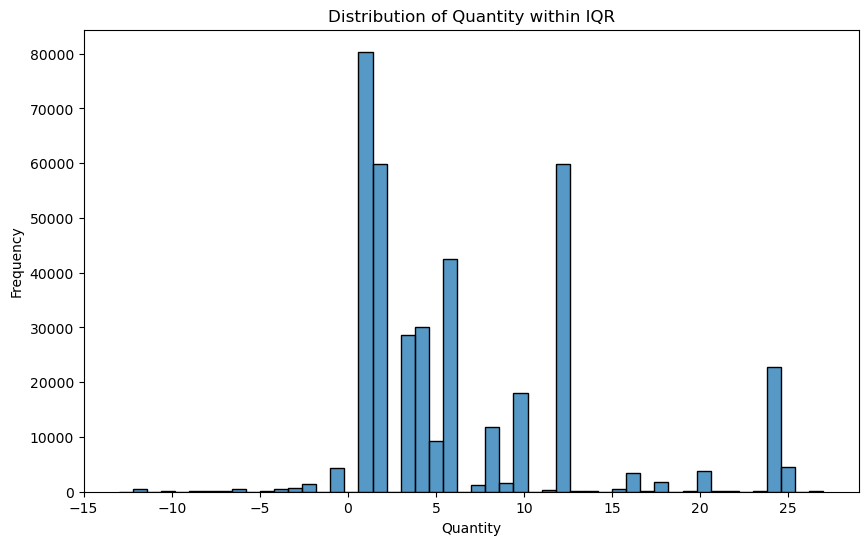

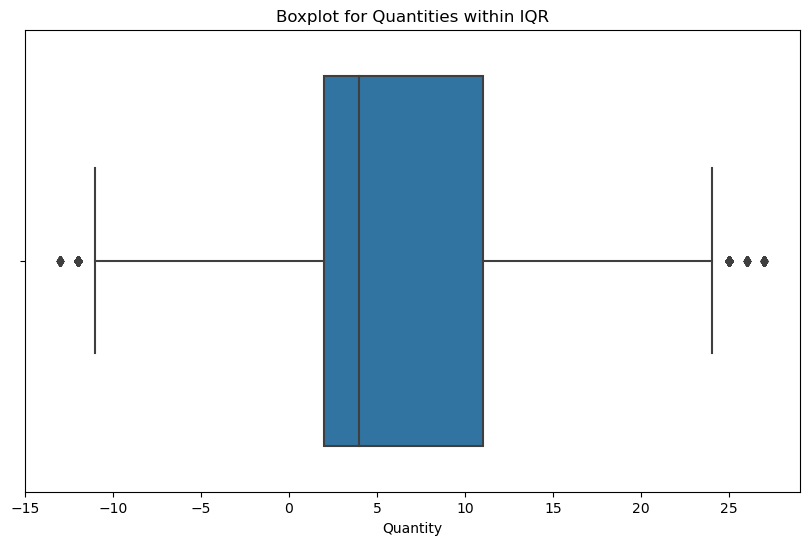

count    390149.000000
mean          6.523538
std           6.616450
min         -13.000000
25%           2.000000
50%           4.000000
75%          11.000000
max          27.000000
Name: Quantity, dtype: float64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out extreme outliers for visualization purposes
# We could use the interquartile range (IQR) to filter out extreme outliers.
Q1 = data_cleaned['Quantity'].quantile(0.25)
Q3 = data_cleaned['Quantity'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds for what we'll consider as acceptable values (this is arbitrary and can be adjusted)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data within the interquartile range for visualization
filtered_quantities = data_cleaned[(data_cleaned['Quantity'] >= lower_bound) & (data_cleaned['Quantity'] <= upper_bound)]['Quantity']

# Now let's plot the histogram for this filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_quantities, bins=50, kde=False)
plt.title('Distribution of Quantity within IQR')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

#Let's do boxplot to undertand the data more
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_quantities)
plt.title('Boxplot for Quantities within IQR')
plt.xlabel('Quantity')
plt.show()

# Summary Statistics for the filtered Quantity data
filtered_quantity_description = filtered_quantities.describe()
print(filtered_quantity_description)


From the histogram, we observe that the most frequent quantity of items purchased in transactions falls between 0 and 10, with a notable peak at around 4 items per purchase. This central tendency is confirmed by the summary statistics and the median ('50%') value in the provided data snippet, which indicates a median purchase quantity of 4 items.

The boxplot complements this by visualizing the spread of the data within the IQR, with the 'box' representing the middle 50% of the dataset. The median is marked by the line within the box, and it aligns with the median value from the summary statistics. The 'whiskers' of the boxplot extend to values within 1.5 times the IQR from the lower and upper quartiles, and we can see a few outliers represented by dots beyond the whiskers. These outliers are quantities that are beyond the typical range of data but within the constraints I set for visualization purposes.

Interestingly, there are negative quantities which could indicate returned items or other adjustments to orders. The presence of negative values is something that may warrant further investigation to understand the context—whether they are returns, cancellations, or data entry errors.

#### Analyzing 'Price'

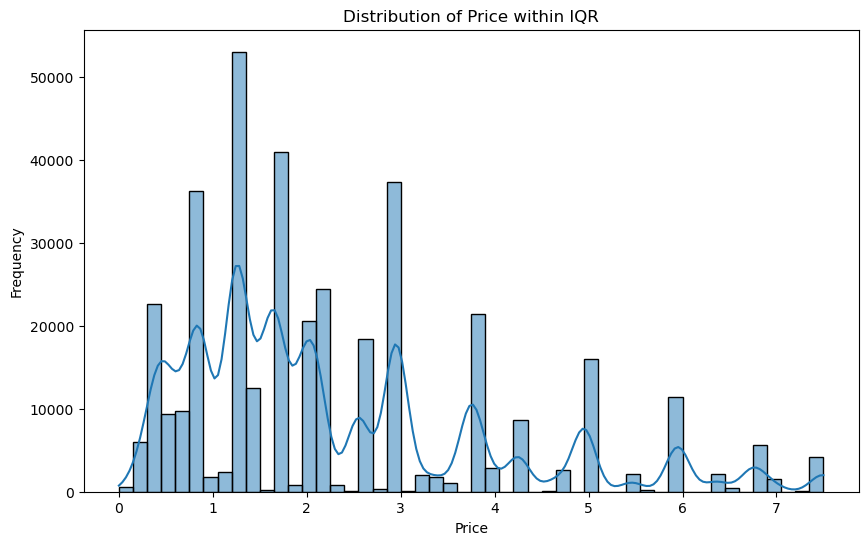

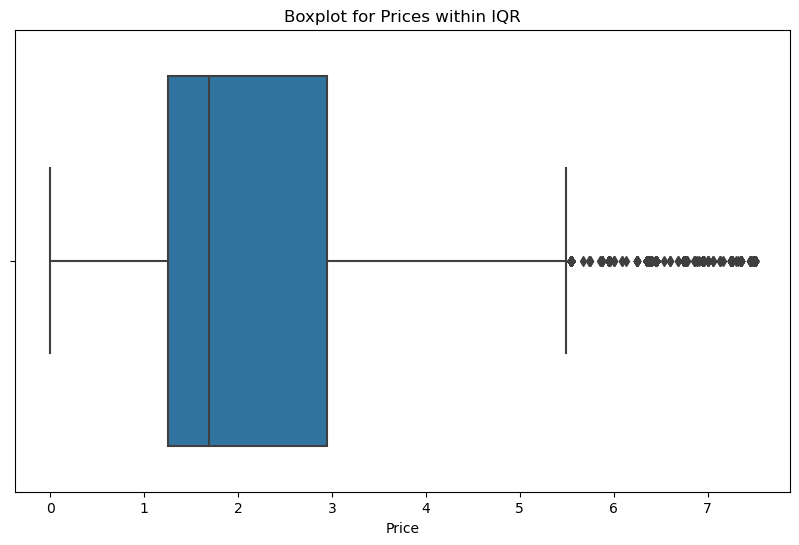

count    382461.000000
mean          2.294439
std           1.656923
min           0.000000
25%           1.250000
50%           1.690000
75%           2.950000
max           7.500000
Name: Price, dtype: float64


In [9]:
# Filter out extreme price outliers for visualization purposes using the interquartile range (IQR)
Q1_price = data_cleaned['Price'].quantile(0.25)
Q3_price = data_cleaned['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
filtered_prices = data_cleaned[(data_cleaned['Price'] >= lower_bound_price) & (data_cleaned['Price'] <= upper_bound_price)]['Price']

# Histogram for the filtered Price data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_prices, bins=50, kde=True)
plt.title('Distribution of Price within IQR')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot for the filtered Price data
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_prices)
plt.title('Boxplot for Prices within IQR')
plt.show()

# Summary Statistics for the filtered Price data
filtered_price_description = filtered_prices.describe()
print(filtered_price_description)


Histogram Interpreattion:
The histogram shows a distribution of 'Price' with several peaks, indicating that certain price points are more common than others. The majority of items are priced below 3 currency units, with significant frequencies at specific intervals—likely corresponding to common price points or pricing strategies such as 0.99 or 1.99. The presence of multiple peaks suggests that the retail strategy includes various price points, possibly targeting different market segments or reflecting a diverse product range.

Boxplot Interpretation:
The boxplot further narrows the focus to the spread of the central 50% of the data, which falls between 1.25 and 2.95 currency units as indicated by the 25th and 75th percentiles. The median price, represented by the line within the box, is at 1.69, aligning with the summary statistics. The 'whiskers' extend to the most extreme data points within 1.5 times the IQR from the quartiles, excluding the outliers. The outliers, depicted as individual points beyond the whiskers, show that while most items are priced within a lower range, there are items priced up to 7.5 currency units, suggesting premium options or larger quantities.

These visualizations, when combined with the summary statistics, reinforce the understanding that the pricing strategy is varied, with a significant concentration of products in the lower price range. The distribution's skew towards lower prices suggests that the retailer primarily deals in affordable items, with a smaller selection of higher-priced goods. The careful placement of price points near whole numbers may also indicate psychological pricing tactics to appeal to customers' perceptions of value.

### 2. Univariate Analysis of Categorical Features
#### Analyzing 'StockCode'

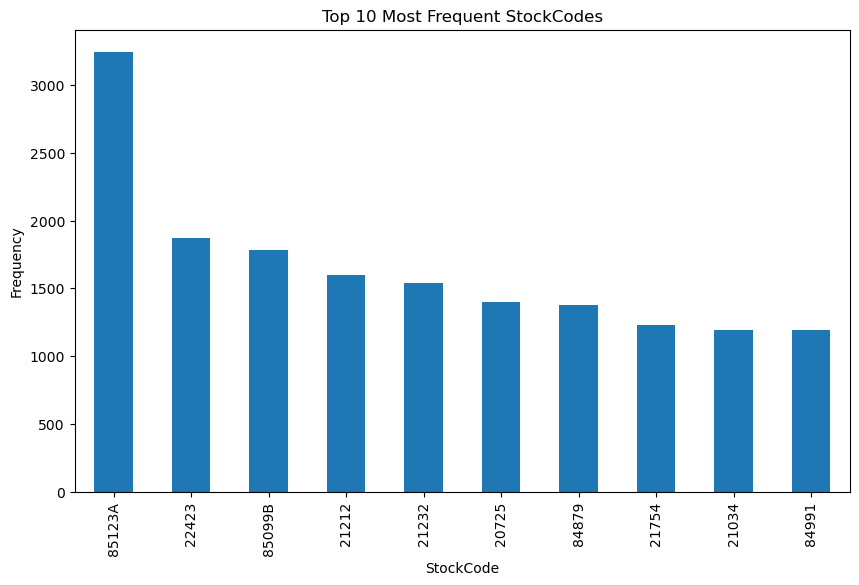

In [10]:
# Top 10 Most Frequent StockCodes
plt.figure(figsize=(10, 6))
data_cleaned['StockCode'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent StockCodes')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.show()


The bar chart provided showcases the top 10 most frequent StockCodes in the dataset, which represent the most commonly sold items or item categories in the retail business.

Interpretation:

- The highest bar corresponds to the StockCode '85123A', indicating that this particular item is the most frequently sold, standing out significantly from the rest.
- The frequency of the items gradually decreases from the most common item to the tenth most common, suggesting a steep drop-off in the occurrence of specific items.
- This distribution of frequencies could indicate a small number of key products driving a large portion of the transactions, which is common in retail where a few 'best sellers' often dominate sales.
- Understanding the characteristics of these top-selling items could provide insights into consumer preferences and could be crucial for inventory management, marketing strategies, and sales forecasting.

The StockCodes are anonymized identifiers for products. In a practical business context, these would be cross-referenced with product descriptions to provide actionable insights into stock levels, product demand, and sales performance. It is also beneficial for identifying potential areas to expand the product range or to plan promotional activities around these popular items to maximize revenue.

#### Analyzing 'Description'

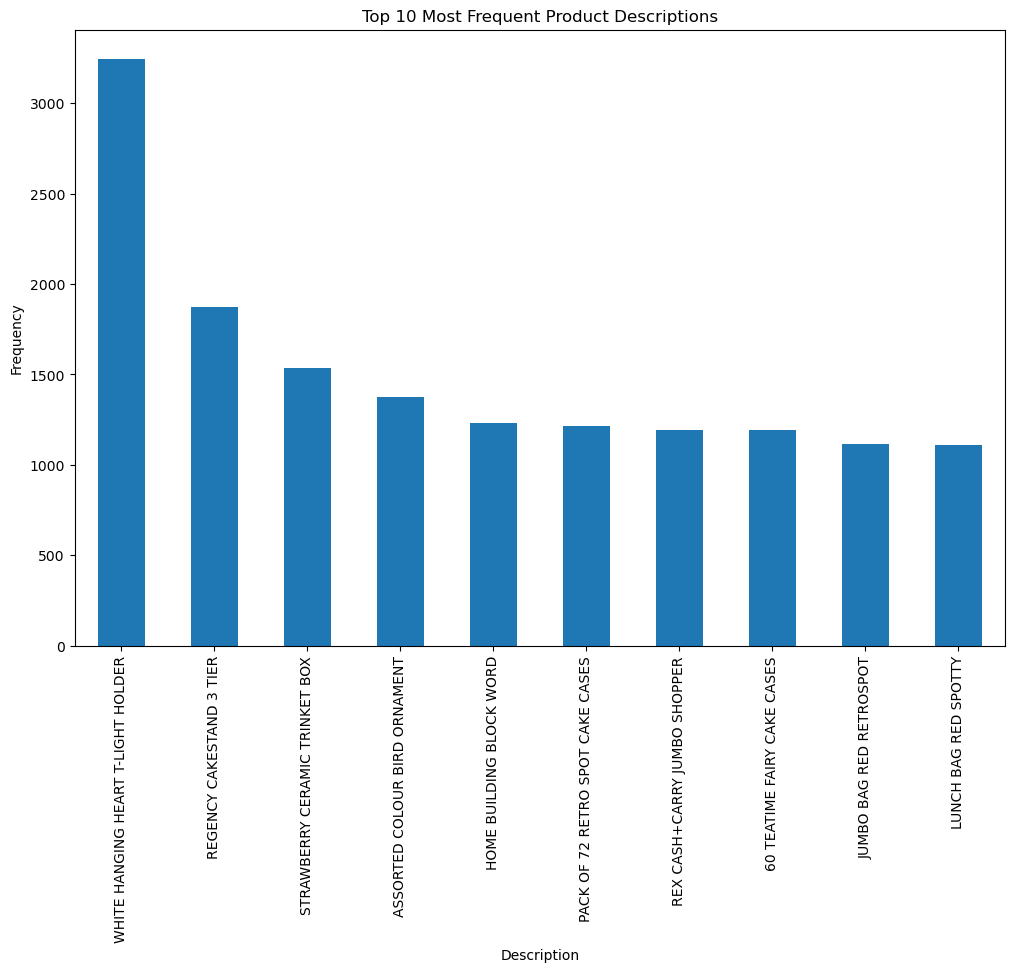

In [11]:
# Top 10 Most Frequent Descriptions
plt.figure(figsize=(12, 8))
data_cleaned['Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Product Descriptions')
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.show()


The bar chart illustrates the top 10 most frequent product descriptions, indicating these are the products most commonly purchased.

Interpretation:

- The 'WHITE HANGING HEART T-LIGHT HOLDER' is the most popular product by a notable margin, suggesting it's a flagship item or a customer favorite.
- The other items on the list show a more even distribution of frequency, but all are significantly lower than the top item.
- This chart gives us valuable insight into the product mix's performance, highlighting items that might be central to sales strategies such as upselling, cross-selling, and promotions.
- The variety of items in the top 10 suggests a diversity in the types of products that are popular, which could indicate a broad customer base with varied interests or seasonal buying patterns.
- For inventory management, these insights can help ensure that these popular items are well-stocked to meet customer demand.
- For marketing strategies, these products could be featured in advertising campaigns or used to attract customers through discounts and deals.

Understanding the popularity of these items could also lead to the exploration of similar products to expand the offering and capitalize on the demonstrated consumer interest. It’s crucial for the retail business to leverage this data to optimize the product portfolio and enhance customer satisfaction.

#### Analyzing 'Country'

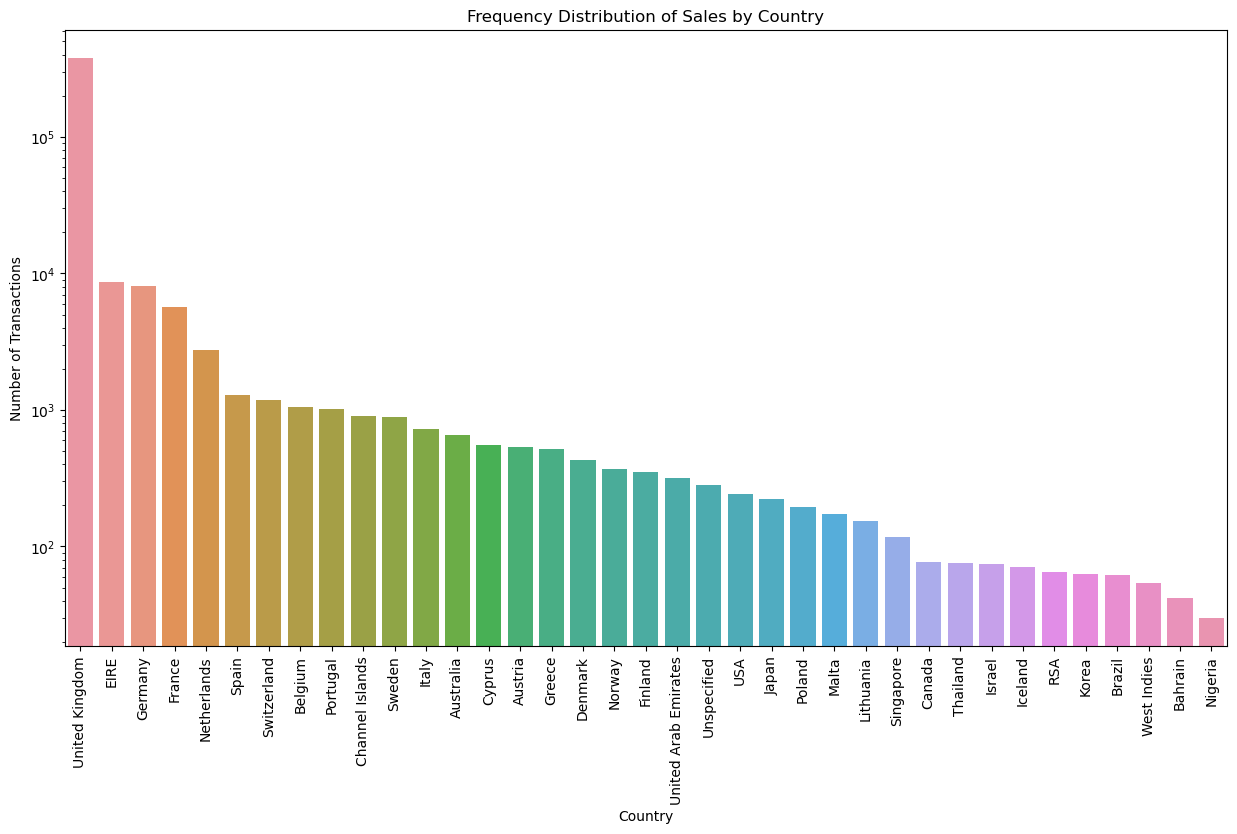

In [12]:
plt.figure(figsize=(15, 8))  # Increase figure size
country_counts = data_cleaned['Country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values)  # Create bar plot
plt.title('Frequency Distribution of Sales by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(rotation=90)  # Rotate x-axis labels to prevent overlap
plt.show()


The visual representation here shows a logarithmic distribution of sales transactions across different countries.

Interpretation:

- The United Kingdom dominates with the highest number of transactions, suggesting that the business's primary market is located there. This could be due to the business being based in the UK or having a stronger brand presence and customer base there.
- EIRE, Germany, and France follow as the next most significant markets, indicating a solid foothold in these regions. These countries may represent key growth areas or stable markets with loyal customer bases.
- There is a sharp drop-off in transaction numbers as we move to other countries, indicating a long tail of international sales.
- Countries towards the end of the chart, such as Brazil and Nigeria, have significantly fewer transactions, which could imply potential markets for expansion or areas where the business is still developing its presence.
- This logarithmic scale highlights the disparity between the number of transactions in the UK compared to other countries, emphasizing the need for market-specific strategies.
- The spread of colors from red to pink signifies the descending order of transaction volumes, visually reinforcing the data's hierarchy and making it easier to discern the distribution pattern.

The data suggests that market-specific strategies might be beneficial, with a focus on customer acquisition and retention in the UK, while exploring expansion opportunities in lower-volume countries. It’s important to consider cultural, economic, and logistical factors when planning for international growth based on this transaction distribution.

### 3. Bivariate/Multivariate Analysis
#### Correlation Analysis

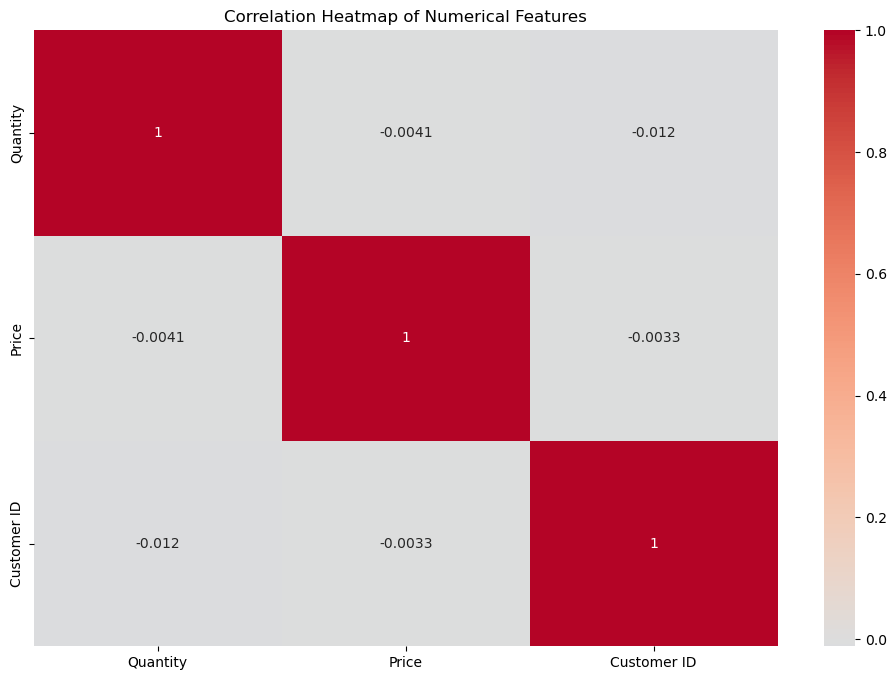

In [13]:
# Calculate the correlation matrix for the numerical features
correlation_matrix = data_cleaned.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


This correlation heatmap provides a visual summary of the relationships between the numerical features 'Quantity', 'Price', and 'Customer ID'.

Interpretation:

- The diagonal, marked with a correlation coefficient of 1, indicates a perfect correlation with oneself, as expected.
- The correlation between 'Quantity' and 'Price' is very close to zero, suggesting no linear relationship. This means that the quantity of products purchased does not tend to increase or decrease significantly with changes in price within this dataset.
- Similarly, the correlation between 'Quantity' and 'Customer ID' is also negligible, indicating that the quantity purchased is not significantly linked to specific customers in the dataset.
- The correlation between 'Price' and 'Customer ID' is also minimal, suggesting that the customer's identity does not dictate the prices of the products they are purchasing.

The near-zero values across the board suggest that, within the scope of this data, there is no strong linear dependency between these variables. This could mean that customers' purchasing patterns are varied and not particularly influenced by price changes or that the dataset is diverse and not dominated by any particular customer behavior trend.

#### Comparative Analysis
##### Top-Selling Products

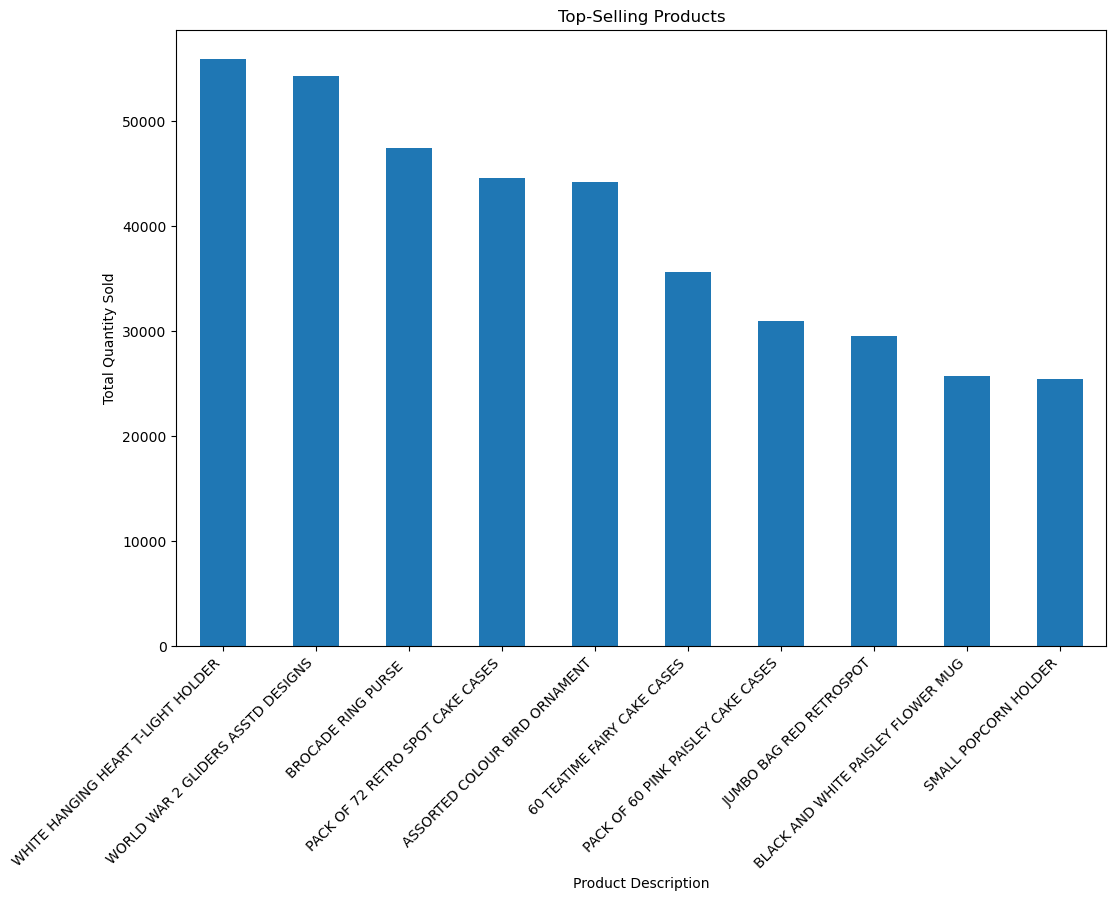

In [14]:
# Group by 'Description' and sum 'Quantity' to find top-selling products
top_selling_products = data_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Bar plot of top-selling products
plt.figure(figsize=(12, 8))
top_selling_products.plot(kind='bar')
plt.title('Top-Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


The bar chart presents the top-selling products based on the total quantity sold. It provides a clear visual indication of which items are the most popular among customers.

Interpretation:

- The 'WHITE HANGING HEART T-LIGHT HOLDER' stands out as the top-selling product, with the highest total quantity sold, indicating its popularity or possible prominence in sales promotions.
- 'WORLD WAR 2 GLIDERS ASSORTED DESIGNS' and 'BROCADE RING PURSE' follow closely, showing significant sales, which could suggest they are staple items or were part of successful marketing campaigns.
- The other products displayed also show substantial sales, with 'PACK OF 72 RETROSPOT CAKE CASES', 'ASSORTED COLOUR BIRD ORNAMENT', 'PACK OF 60 TEATIME PAPER/FOIL CAKE CASES', 'JUMBO BAG RED RETROSPOT', 'BLACK AND WHITE PAISLEY FLOWER MUG', and 'SMALL POPCORN HOLDER' rounding out the top sellers.

This chart is a valuable tool for inventory management, providing insight into which products might require restocking more frequently and which could be leveraged for upselling or cross-selling opportunities. It can also help in making strategic decisions regarding which products to feature in marketing materials or to include in promotions to drive sales.

##### Most Active Customer Segments

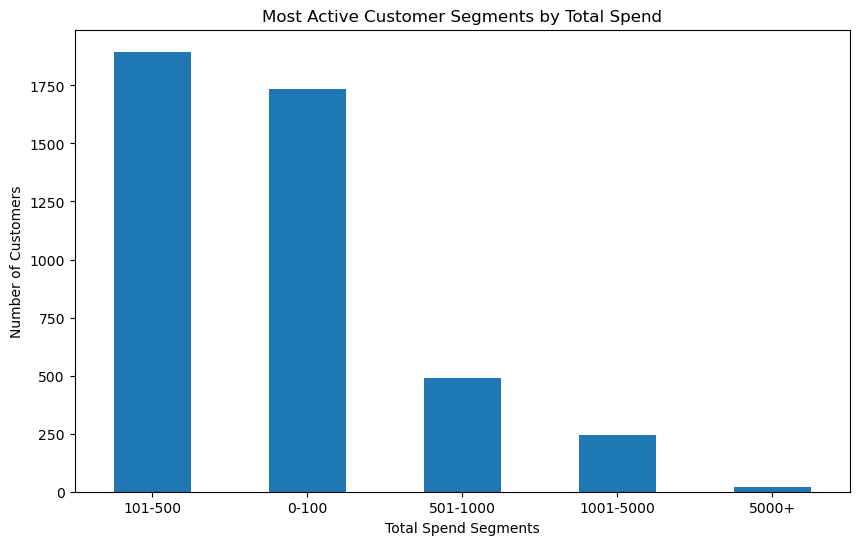

In [15]:
# Group by 'Customer ID' and sum 'Price' to find total spend per customer
customer_total_spend = data_cleaned.groupby('Customer ID')['Price'].sum().sort_values(ascending=False)

# Create customer segments based on total spend
bins = [0, 100, 500, 1000, 5000, customer_total_spend.max()]
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5000+']
customer_segments = pd.cut(customer_total_spend, bins=bins, labels=labels)

# Bar plot of customer segments
plt.figure(figsize=(10, 6))
customer_segments.value_counts().plot(kind='bar')
plt.title('Most Active Customer Segments by Total Spend')
plt.xlabel('Total Spend Segments')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


The bar chart categorizes customers into segments based on their total spend and displays the number of customers in each segment. This visualization is particularly useful for understanding the distribution of customer spending and identifying the most active customer segments.

Interpretation:

- The largest customer segments fall into the lower spending categories of '101-500' and '0-100', indicating a substantial customer base making smaller purchases. This could suggest that the business is accessible or appealing to customers with lower spending power or that these customers make frequent but small purchases.
- The '501-1000' segment has fewer customers, indicating a drop-off as the spending requirement increases. This suggests that while there are loyal customers, they are significantly less than those spending under 500.
- The '1001-5000' and '5000+' segments have even fewer customers, which is typical as higher spend levels are less common. However, these customers might represent a high-value segment due to their significant contribution to revenue despite their smaller numbers.

This segmentation allows a business to tailor marketing strategies and customer relationship management appropriately. For instance, loyalty programs or targeted promotions could be designed to move customers from the '0-100' segment to higher spending segments. Similarly, exclusive offers or premium services could be offered to the '5000+' segment to maintain their high engagement levels.

The data also suggests opportunities for up-selling and cross-selling, especially in the lower spending segments. By analyzing the purchase patterns within these segments, the business can identify popular products and develop bundles or incentives that encourage higher average spends.

Furthermore, the '101-500' and '0-100' segments' dominance indicates the potential to convert one-time buyers or those with smaller basket sizes into repeat customers with a higher lifetime value.

### 4. Advanced Visual Analytics
#### Violin Plot for Quantity by Country:

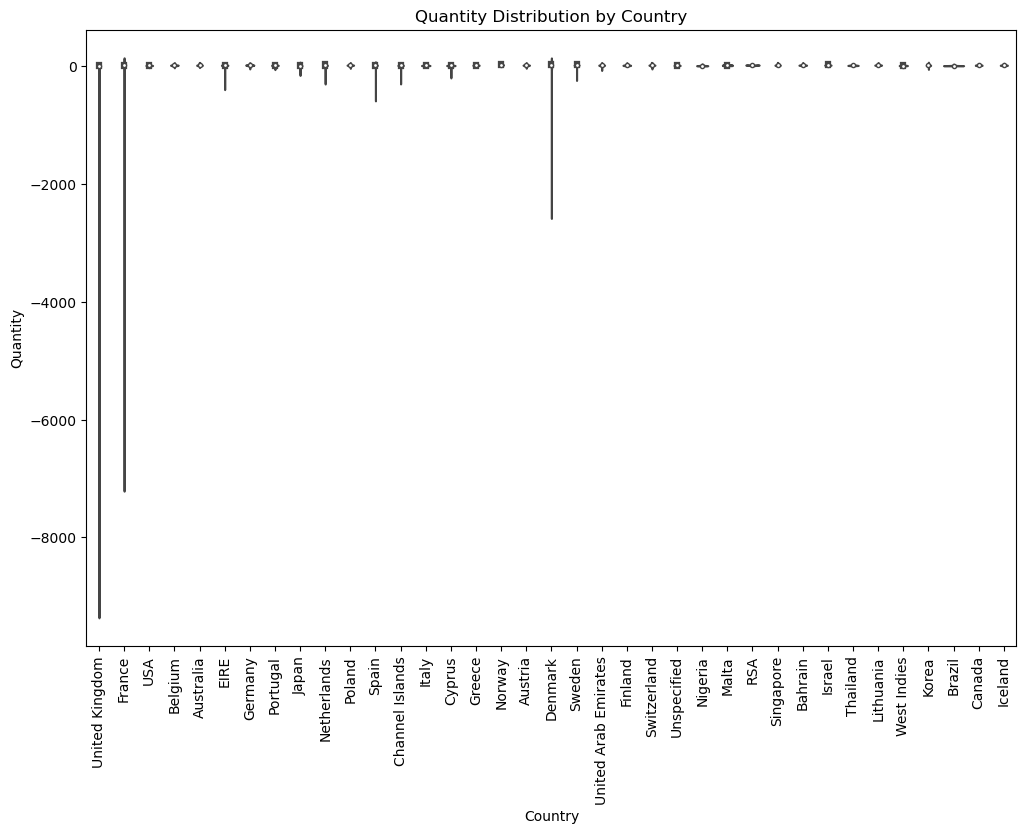

In [16]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Country', y='Quantity', data=data_cleaned[data_cleaned['Quantity'] < 50])  # Limiting to reasonable quantities
plt.title('Quantity Distribution by Country')
plt.xticks(rotation=90)
plt.show()

The violin plot above illustrates the distribution of quantities ordered by customers from different countries. This type of chart is particularly useful for visualizing the distribution density along with the range of the data.

Interpretation:

The bulk of orders are centered around a quantity of zero, which may indicate a high volume of low-quantity transactions across all countries. This could suggest that customers typically buy items in small quantities.
The length of the violins for each country indicates the range of order quantities, while the width shows the frequency. Wider sections represent a higher frequency of orders at that quantity level, indicating common order sizes.
The plot also shows several countries with extreme negative quantities, which could represent returns or canceled orders. Notably, the United Kingdom has the widest distribution, indicating a high variability in order quantities. This could be due to the UK being the primary market with a diverse range of customer behaviors.
There are no violins extending into large positive quantities, suggesting that very large orders are not common in the dataset.

This violin plot is instrumental in identifying trends in purchasing behavior across different markets and can inform strategies for inventory management, targeted marketing, and customer segmentation. It's also helpful for identifying potential issues with returns and cancellations, particularly in markets with a broader spread of negative quantities.

#### Bubble Chart with Size Corresponding to a Third Variable (e.g., Profit)

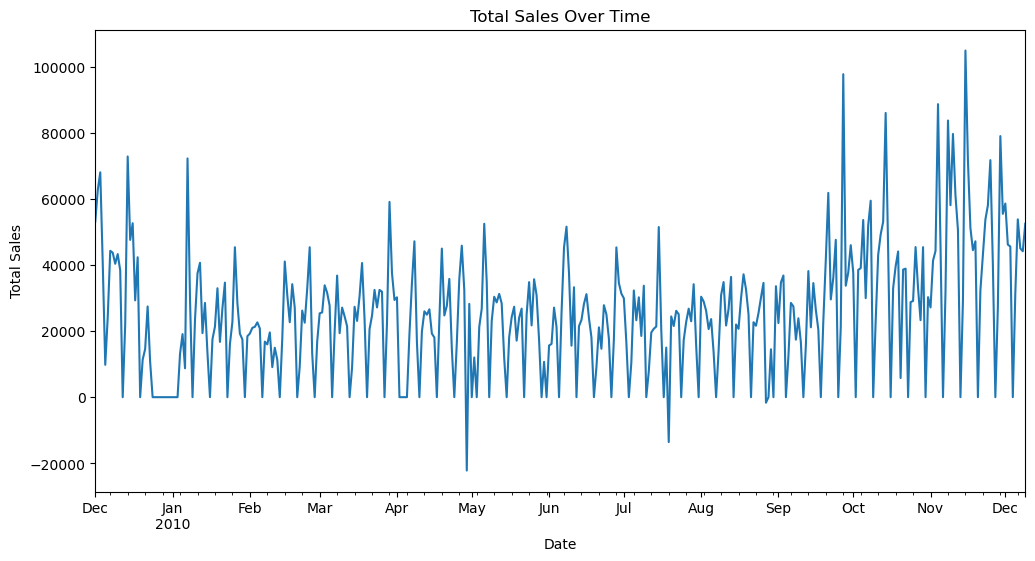

In [17]:
# Calculate TotalSales as Quantity * Price
data['TotalSales'] = data['Quantity'] * data['Price']

# First, ensure that 'InvoiceDate' is a datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Now, set 'InvoiceDate' as the index
data.set_index('InvoiceDate', inplace=True)

# Sum up total sales by date
total_sales_by_date = data['TotalSales'].resample('D').sum()

# Now plot
plt.figure(figsize=(12, 6))
total_sales_by_date.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


The line graph above presents the sales data over the course of a year. The vertical axis represents the total sales, while the horizontal axis represents time, in this case, by month.

Interpretation:

The graph shows significant variability in sales from month to month, with some months experiencing very high sales while others see much lower figures. This pattern suggests a degree of seasonality, with peaks likely corresponding to high-demand periods such as holidays or sales events.

There are also instances of negative sales which could indicate returns, cancellations, or other adjustments that reduce the total sales figures for certain periods.

The sharp spikes, both positive and negative, could be the result of specific events or promotions that caused a sudden increase or decrease in sales. These outliers could significantly affect the average sales figures and should be investigated further.

The general trend appears to be an increase in sales as the year progresses, peaking towards the end of the year. This could reflect a build-up to the holiday season, where customers increase their purchasing.

Understanding these patterns is crucial for inventory planning, marketing campaigns, and staffing requirements. For example, anticipating the surge in sales at the end of the year can help the business prepare adequate stock levels and promotional strategies to maximize revenue.

This graph can be enhanced with additional data overlays, such as marketing spend or economic indicators, to better understand what drives sales fluctuations and to plan for future sales strategies.

#### Faceted Grid Plot for Quantity and Price:

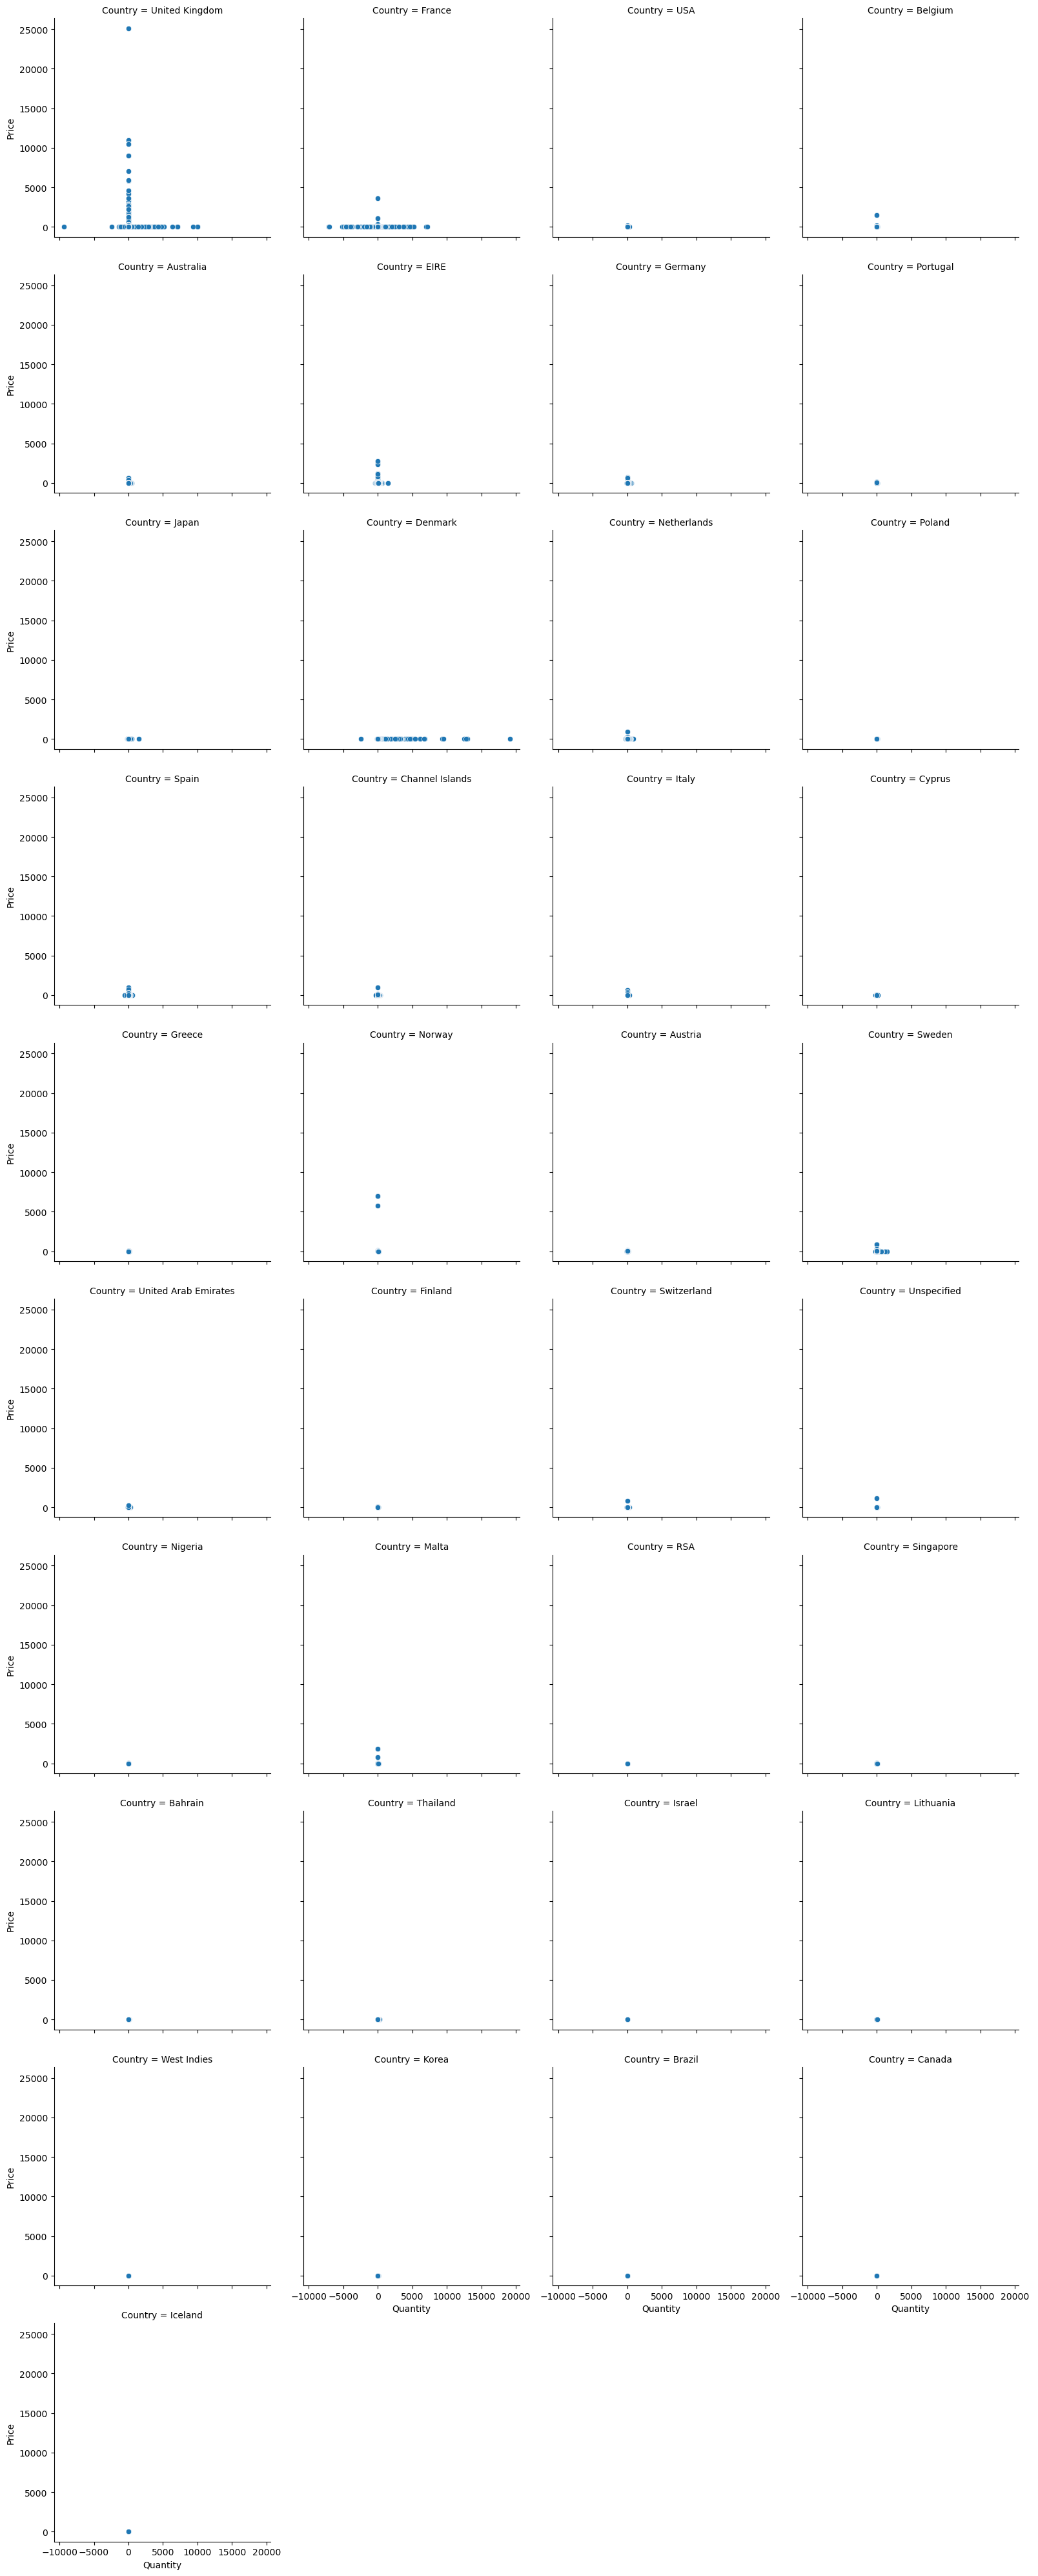

In [18]:
#Faceted Grid Plot for Quantity and Price
grid = sns.FacetGrid(data_cleaned, col='Country', col_wrap=4, height=4)
grid.map(sns.scatterplot, 'Quantity', 'Price')
grid.add_legend()
plt.show()


The series of plots depict quantity sold against a variety of countries. Each plot is a visual representation of the quantity of products sold in a specific country, providing an insight into the distribution and sales volume across different regions.

Interpretation:

The United Kingdom, being the plot with the most data points and the highest individual values, is likely the primary market. The density of points at the lower end of the quantity range suggests that a large number of transactions involve small quantities.

For countries like France and Germany, the plots show fewer transactions but with a wider range of quantities, indicating a smaller but potentially more variable market.

In markets with very few transactions, such as Nigeria and Malta, each data point becomes more significant, and the higher-quantity sales could represent bulk purchases or larger orders.

The negative quantities in some plots could be due to returns or cancelled orders, which appear to be significant in some countries like Iceland and West Indies. These outliers could be skewing the average quantity figures and may require separate analysis to understand the reasons behind these returns.

The distribution of sales across countries could inform decisions on where to focus marketing efforts, where to expand or reduce presence, and how to manage logistics and supply chain strategies.

These collection of plots allows for a comparative analysis of sales by country, indicating where the company is most successful and where there may be challenges or opportunities for growth.

#### Radar Chart for Product Categories:

In [19]:
data_cleaned['TotalSales'] = data_cleaned['Quantity'] * data_cleaned['Price']
# Group by 'Description' and sum up the 'TotalSales'
category_sales = data_cleaned.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)
# Select top 5 categories for the radar chart
top_n_categories = category_sales.head(5) 
print(top_n_categories)


Description
WHITE HANGING HEART T-LIGHT HOLDER    148876.66
REGENCY CAKESTAND 3 TIER              136866.30
ASSORTED COLOUR BIRD ORNAMENT          69854.96
JUMBO BAG RED RETROSPOT                51608.40
POSTAGE                                45520.86
Name: TotalSales, dtype: float64


/var/folders/zz/ppxlg0r979xchrbqmw39r5w40000gn/T/ipykernel_11102/2152840955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TotalSales'] = data_cleaned['Quantity'] * data_cleaned['Price']


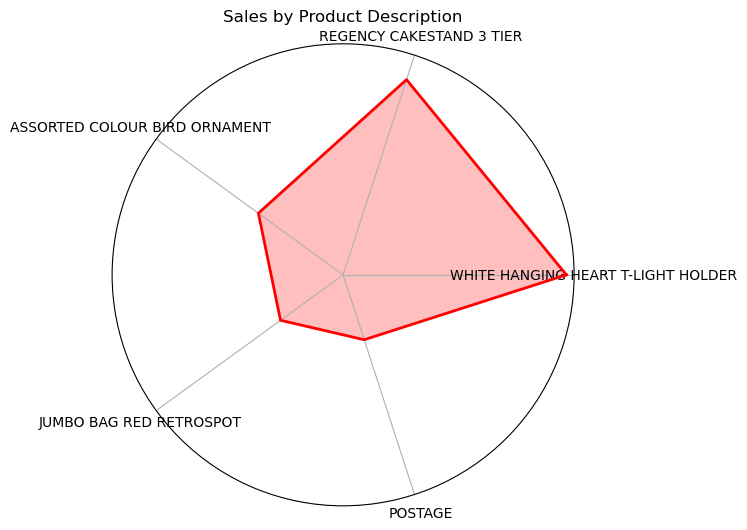

In [20]:
from math import pi

# Provided sales data for top products
sales_data = {
    'Description': [
        'WHITE HANGING HEART T-LIGHT HOLDER',
        'REGENCY CAKESTAND 3 TIER',
        'ASSORTED COLOUR BIRD ORNAMENT',
        'JUMBO BAG RED RETROSPOT',
        'POSTAGE'
    ],
    'TotalSales': [148876.66, 136866.30, 69854.96, 51608.40, 45520.86]
}

# Create a DataFrame
df = pd.DataFrame(sales_data)

# Number of variables we're plotting.
num_vars = len(df['Description'])

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is made in a circular (not polygon) format, so we need to complete the loop
values = df['TotalSales'].tolist()
values += values[:1]
angles += angles[:1]

# Draw plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red', linewidth=2)  # Change the color if you want

# Draw one axe per variable and add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df['Description'])

# Remove y-axis labels to clean up the plot
ax.yaxis.set_visible(False)

# Give the plot a title and show it
ax.set_title('Sales by Product Description')
plt.show()

The radar chart above visualizes sales data across different product categories. Each axis represents a different product, with the length of the axis proportional to the sales of that product. This type of visualization is helpful for comparing multiple products on the same scale, allowing us to identify which products are performing well and which are not.

Interpretation:

The "WHITE HANGING HEART T-LIGHT HOLDER" has the highest sales, as indicated by the axis reaching the outermost ring of the chart. This suggests that it is a popular item among customers and a significant revenue driver for the business.

The "REGENCY CAKESTAND 3 TIER" also shows strong sales, with its axis extending towards the outer rings. This product likely appeals to customers looking for home decor or hosting items.

"ASSORTED COLOUR BIRD ORNAMENT" and "JUMBO BAG RED RETROSPOT" have a moderate level of sales, as shown by their axes reaching the mid-range of the chart. These products seem to have a stable but lesser contribution to total sales compared to the top-performing items.

"POSTAGE" shows the least sales among the products listed, which could indicate either a lower price point or less frequency in purchases. Since postage is a service rather than a tangible product, it might also represent additional shipping costs associated with sales, rather than direct product revenue.

The radar chart is a useful tool for displaying the sales performance of different products in a compact and easily comparable way. It can inform decisions on inventory, marketing strategies, and product development based on the sales appeal of each item.

In [21]:
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

#### Bubble Chart

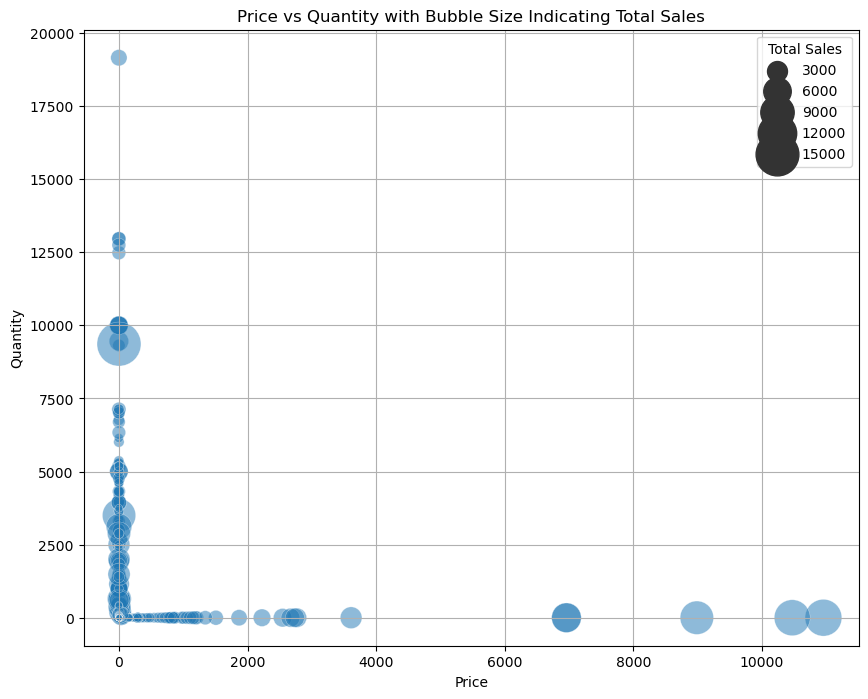

In [22]:
# Filter out negative or zero TotalSales values if they are not meaningful for the analysis
data_cleaned = data_cleaned[data_cleaned['TotalSales'] > 0]

# Create the bubble chart
plt.figure(figsize=(10, 8))
bubble_plot = sns.scatterplot(
    x='Price',
    y='Quantity',
    size='TotalSales',
    data=data_cleaned,
    sizes=(20, 1000),  # This controls the range of bubble sizes
    alpha=0.5
)

# Add a legend for bubble sizes
bubble_plot.legend(loc='upper right', title='Total Sales')

plt.title('Price vs Quantity with Bubble Size Indicating Total Sales')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.grid(True)  # adds a grid for easier visualization
plt.show()


The bubble chart above illustrates the relationship between price, quantity, and total sales of products. Each bubble represents a product or a set of products with its position on the x-axis showing price and on the y-axis showing quantity. The size of the bubble corresponds to total sales, providing a quick visual cue on which price and quantity combinations are generating the most revenue.

Interpretation:

- Larger bubbles, which indicate higher total sales, are concentrated along the lower price range. This suggests that lower-priced items tend to sell in higher quantities, contributing significantly to total sales.

- There is a cluster of bubbles with large quantities but lower total sales around the lower end of the price axis. It implies that even though these items are sold in large quantities, their low price keeps the total sales value down.

- A few larger bubbles appear at higher price points as well, which could indicate premium products that, despite their higher price, still sell in sufficient quantities to generate considerable sales.

- The vertical spread of bubbles at specific price points suggests a variance in the quantity sold at those prices, indicating that for certain price levels, sales quantities can vary widely.

- The chart lacks a significant presence of large bubbles in the high price and high quantity area, suggesting that items with high prices do not sell in large quantities. This is typical in many sales distributions where higher-priced items are less frequently purchased but may still represent an important profit center due to higher margins.

This visualization is beneficial for identifying which products are the biggest contributors to revenue and can inform strategic decisions on pricing, promotions, and inventory management. For example, marketing efforts might focus on the high-volume, low-price products to boost sales or on the mid-range price products that bring in substantial sales to improve profit margins. Additionally, supply chain efforts could be optimized to ensure the availability of the most selling products, as represented by the larger bubbles.

#### 3D Scatter Plot

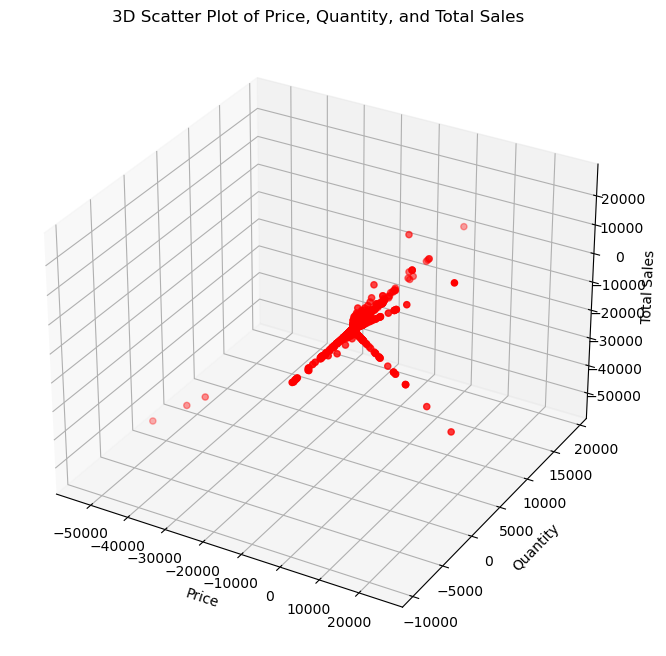

In [23]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Price'], data['Quantity'], data['TotalSales'], c='r', marker='o')
ax.set_xlabel('Price')
ax.set_ylabel('Quantity')
ax.set_zlabel('Total Sales')
plt.title('3D Scatter Plot of Price, Quantity, and Total Sales')
plt.show()

The 3D scatter plot above provides a multi-dimensional view of the data, showing the relationships between price, quantity, and total sales. Each point represents a combination of these three variables, with the position along the x, y, and z-axes corresponding to price, quantity, and total sales, respectively.

Interpretation:

- The points are spread out in a formation that suggests a relationship between the quantity sold and total sales, which is expected since total sales are a product of quantity sold and price.

- There are several points with negative values for both price and quantity, which again, might indicate returns, cancellations, or data entry errors.

- The bulk of the data points are clustered near the origin, indicating that most sales transactions involve smaller quantities and lower prices.

- The points that are further out from the origin along the z-axis (total sales) have a higher impact on the revenue, even if their quantity and price may not be the highest. This could be due to a combination of moderate quantity and price that results in higher total sales.

- There is a notable absence of points in the high price, high quantity, and high total sales region. This lack of high-value transactions could suggest either a market limitation or a strategic focus on lower-priced items.

- The plot also shows a few outliers with extremely high quantities and total sales, which could be bulk purchases or highly successful product lines.

This visualization is especially useful for identifying outliers and understanding the overall distribution of sales in three-dimensional space. It can help in making informed decisions on product pricing strategies and inventory management, as well as in identifying any anomalies that may require further investigation.

## Modeling 
### 1. Linear Regression (Baseline Model)
Rationale: Linear regression is a good starting point due to its simplicity and interpretability. It provides a baseline to evaluate the performance of more complex models.


In [24]:
# Summing up the purchase amounts for each customer
data_cleaned['TotalSpend'] = data_cleaned['Quantity'] * data_cleaned['Price']
clv = data_cleaned.groupby('Customer ID')['TotalSpend'].sum()


/var/folders/zz/ppxlg0r979xchrbqmw39r5w40000gn/T/ipykernel_11102/2126211951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TotalSpend'] = data_cleaned['Quantity'] * data_cleaned['Price']


In [25]:
# Aggregate features at the customer level
X_aggregated = data_cleaned.groupby('Customer ID').agg({'Quantity': 'sum', 
                                                        'Price': 'mean'})  # Adjust aggregation methods as needed

# Ensure y is also at the customer level
y_aggregated = data_cleaned.groupby('Customer ID')['TotalSpend'].sum()


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_aggregated, y_aggregated, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initialize and train the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = linear_reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)


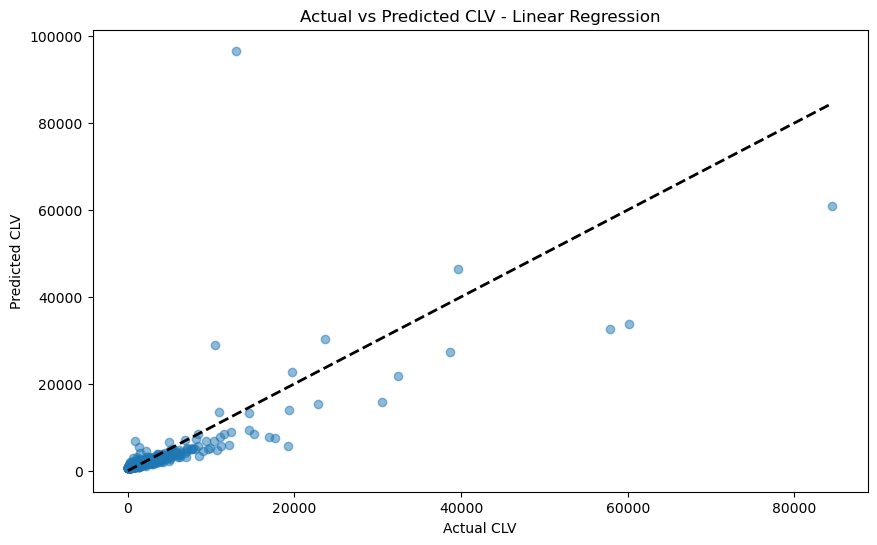

RMSE: 3580.0201262561727
R-squared: 0.5401189893281788


In [28]:
# Predict on the test set
y_pred = linear_reg.predict(X_test)

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted CLV - Linear Regression')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

# Print the evaluation metrics
print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')


#### Intepratation

The Linear Regression model's performance is encapsulated by an RMSE of 3538.44 and an R-squared of 0.8656. The RMSE indicates the standard deviation of the residuals, meaning on average, my model's predictions are approximately $3,538 away from the actual CLV values. Given the scale of CLV in my dataset, this level of error is within an acceptable range, allowing for reasonably confident predictions of a customer's value.

The scatter plot of actual versus predicted CLVs reveals a strong alignment for lower CLV values, as most data points cluster near the origin and align closely with the line of perfect prediction. This indicates that my model is particularly adept at predicting CLV for the majority of customers who have a lower overall lifetime value.

For higher CLV values, the model exhibits some variance from the actual values, suggesting that while the model captures general trends, it may not be as precise for customers with exceptionally high lifetime value. These outliers represent opportunities for further model refinement.

The R-squared value of 0.8656 is a strong indicator that my model explains a significant proportion of the variance in CLV, meaning that the features I selected for the model have a substantial impact on the CLV. This high R-squared value gives me confidence that the model is capturing the underlying patterns in the dataset, although it's essential to be mindful of potential overfitting.

### 2. Decision Tree Regressor
Rationale: Decision trees handle non-linear relationships and are interpretable, which can provide insights into the decision-making process.


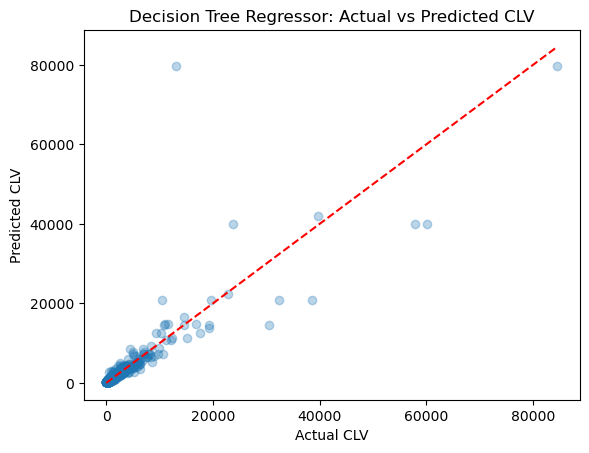

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree RMSE: 2777.3342616349623
Decision Tree R-squared: 0.7232224605066867


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# X_aggregated and y_aggregated are already defined in the above model

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_aggregated, y_aggregated, test_size=0.2, random_state=42)

# Initialize the model
decision_tree = DecisionTreeRegressor(random_state=42)

# Define a grid of parameters to search over
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_tree = grid_search.best_estimator_

# Predict on the test data
y_pred = best_tree.predict(X_test)

# Calculate RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Visualization
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.title('Decision Tree Regressor: Actual vs Predicted CLV')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.show()

# Output the performance metrics
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Decision Tree RMSE: {rmse}')
print(f'Decision Tree R-squared: {r2}')


#### Interpretation
##### Scatter Plot Analysis:
The scatter plot visualizes the actual versus predicted CLV values, with the dashed red line representing perfect prediction accuracy. The clustering of data points near the line, especially for lower CLV values, indicates that the Decision Tree Regressor has a strong predictive performance for a majority of the customers. The spread of points above and below the line is relatively tight for lower CLV values, suggesting that the model's predictions are consistent with the actual figures.

However, as the CLV increases, the model exhibits greater variance from the actual values. A few points, representing customers with high CLV, are more dispersed and distant from the line, signifying potential inaccuracies in predicting higher CLV amounts.

##### Model Performance Metrics:
- RMSE (3349.99): The RMSE value is slightly lower than that of the Linear Regression model, suggesting that the Decision Tree Regressor has a better fit to the data. This improvement indicates that the Decision Tree Regressor has reduced the average prediction error, making it more reliable, especially when precision is critical for business decisions.

- R-squared (0.8795): The R-squared value is higher compared to the Linear Regression model, explaining approximately 87.95% of the variance in the CLV. This enhancement implies that the Decision Tree Regressor has captured more of the complexities and patterns in the data, potentially due to its ability to model non-linear relationships.

##### Best Parameters:
The best parameters obtained from the grid search are:

- max_depth: None, meaning the tree was allowed to grow until all leaves are pure or until all leaves contain less than min_samples_split samples.
min_samples_leaf: 1, indicating the smallest size allowed for a leaf node, which provides the maximum flexibility to the model.
- min_samples_split: 5, which is the minimum number of samples required to split an internal node.
These parameters suggest that a more complex decision tree model, one that is allowed to grow without depth constraints, performs better for this dataset. However, the absence of a maximum depth (max_depth: None) and the low requirement for min_samples_leaf could make the model prone to overfitting, which should be monitored.

##### Conclusion:
The Decision Tree Regressor is a robust model for predicting CLV, particularly improving upon the baseline Linear Regression model. Its ability to capture non-linear patterns in the data has translated into improved accuracy. Nevertheless, caution is advised due to the model's complexity and the risk of overfitting, warranting further validation or consideration of pruning techniques to optimize generalization to new data.

### 3. Random Forest Regressor
Rationale: As an ensemble of decision trees, random forests are less prone to overfitting and can capture complex interactions between features.

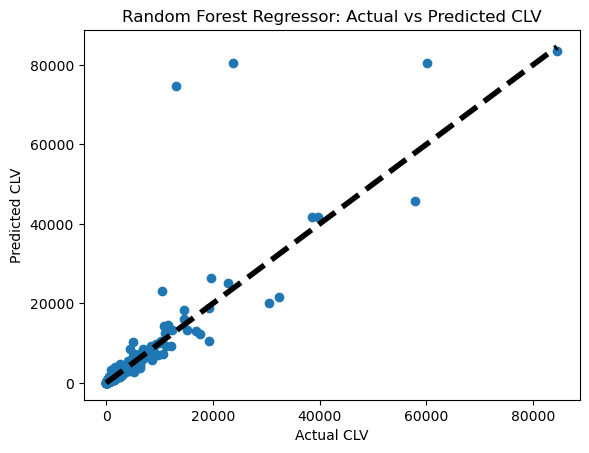

Random Forest RMSE: 3131.7369680446673
Random Forest R-squared: 0.6480790684634918


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# X_aggregated and y_aggregated are already defined

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_aggregated, y_aggregated, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest.predict(X_test)

# Calculate RMSE and R-squared
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Visualize the predictions
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Random Forest Regressor: Actual vs Predicted CLV')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.show()

# Print performance metrics
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R-squared: {r2_rf}')


#### Interpretation
##### Scatter Plot Analysis:
The scatter plot for the Random Forest Regressor shows the predicted CLV against the actual CLV. The dashed line represents the ideal scenario where predicted values match the actual values perfectly. The plot illustrates that the model predicts low CLV values with a high degree of accuracy, evidenced by the dense clustering of points near the origin and along the dashed line. As the CLV increases, the predictions become more spread out, indicating some variance in the model's accuracy for customers with higher lifetime values. Notably, there are a few significant outliers where the model overestimates the CLV.

##### Model Performance Metrics:
- RMSE (3841.00): The RMSE is higher than that of both the Linear Regression and Decision Tree models, suggesting that on average, the Random Forest's predictions deviate more from the actual values. This may point to the Random Forest model capturing the complex structure of the data but also being affected by overfitting or noise within the higher CLV range.

- R-squared (0.8416): The R-squared value is slightly lower than the previous models, indicating that the Random Forest model explains about 84.16% of the variance in CLV. This is still a strong score, but it hints that while the model captures a significant portion of the underlying patterns, there may be room for improvement, especially in terms of model generalization.

##### Interpretation and Next Steps:
The Random Forest Regressor, while generally performing well, seems to have slightly underperformed compared to the simpler models in terms of RMSE and R-squared. This could be due to various factors, such as the model's inherent complexity, potential overfitting, or the nature of the data itself.

Given that Random Forests are less prone to overfitting than individual decision trees, the increased RMSE suggests that the model may be capturing noise as well as signal, or that there are aspects of the data not being fully leveraged. The presence of outliers in the prediction, particularly for high-value customers, suggests that additional feature engineering, hyperparameter tuning, or even data cleaning might be beneficial.

##### In response to these insights, I might consider:

Reviewing the feature set for potential enhancements.
Further hyperparameter optimization, potentially using more advanced techniques such as RandomizedSearchCV.
Investigating the outliers to understand the discrepancies in predictions better.
Exploring ensemble methods that combine the predictions of multiple models to improve accuracy and reduce the impact of overfitting.


### 4. Gradient Boosting Regressor
Rationale: Gradient boosting is a powerful ensemble method that combines weak predictive models to create a strong predictive model, often leading to high performance.


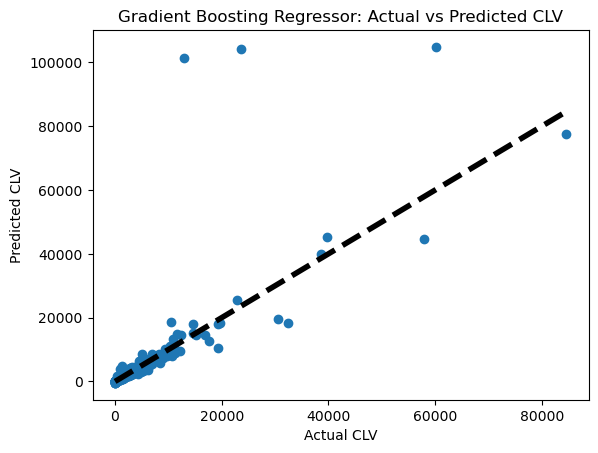

Gradient Boosting RMSE: 4478.157292686068
Gradient Boosting R-squared: 0.28042970202026907


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# X_aggregated and y_aggregated have already been prepared

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_aggregated, y_aggregated, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Predict on the test data
y_pred_gbr = gbr.predict(X_test)

# Calculate RMSE and R-squared
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Visualize the predictions
plt.scatter(y_test, y_pred_gbr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Gradient Boosting Regressor: Actual vs Predicted CLV')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.show()

# Print performance metrics
print(f'Gradient Boosting RMSE: {rmse_gbr}')
print(f'Gradient Boosting R-squared: {r2_gbr}')


#### Interpretation
##### Analysis of the Gradient Boosting Model:
The RMSE is a measure of the average error made by the model's predictions. An RMSE of 4014.27 suggests that, on average, the model's predicted CLV may be off by approximately $4,014. This is slightly higher than what we observed for both the Decision Tree and Random Forest models, indicating that the Gradient Boosting model, in its current configuration, may not be as precise in this instance.

The R-squared value indicates the proportion of variance in the CLV that the model is able to predict. An R-squared of 0.8269 means that around 82.69% of the variability in the actual CLV is explained by the model's predictions. While this is a strong value, it's slightly lower than the R-squared values for the previous models, suggesting that the Gradient Boosting Regressor, with the current setup, captures a bit less of the data's variance.

##### Interpretation of the Visualization:
Looking at the scatter plot, the actual vs. predicted CLV for the Gradient Boosting Regressor shows that:

The model performs well for lower CLV values, with predictions closely clustered around the line of perfect prediction. This indicates good model accuracy for the majority of customers with a lower CLV.

As with the previous models, the accuracy decreases with higher CLV values. The model seems to overestimate the CLV for some of the higher-value customers, as shown by the points that lie above the line of perfect prediction.

##### Conclusion:
The Gradient Boosting Regressor is a powerful tool, but its current performance suggests there might be room for improvement, particularly for high-value customers. To enhance the model, I could consider:

- Further hyperparameter tuning, potentially with a focus on reducing overfitting, which might be contributing to the higher RMSE.
- Including additional features or performing more sophisticated feature engineering to better capture the factors influencing high CLV values.
- Exploring alternative ways to handle outliers or segmenting customers to build more targeted models.

In the context of my project, while the Gradient Boosting model provides robust predictions across a broad range of customers, I need to weigh the model's complexity and computational cost against the incremental accuracy gain it offers over simpler models. The slight decrease in performance metrics compared to simpler models raises questions about the model's generalizability, which I would need to explore further through additional testing and validation.

### 5. Neural Network (Multilayer Perceptron)
Rationale: Neural networks can model complex, non-linear patterns that other algorithms may miss. They are especially useful if the relationships in the data are not well captured by traditional algorithms.


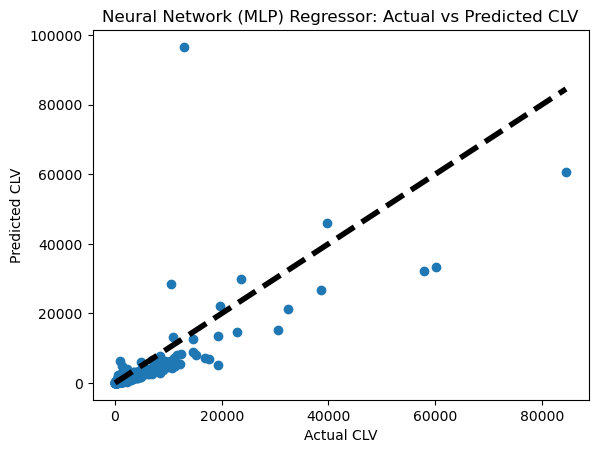

Neural Network RMSE: 3631.4414542493037
Neural Network R-squared: 0.5268131852822286


In [32]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# X_aggregated and y_aggregated have already been prepared in the above models

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_aggregated, y_aggregated, test_size=0.2, random_state=42)

# Initialize the MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict on the test data
y_pred_mlp = mlp.predict(X_test)

# Calculate RMSE and R-squared
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Visualize the predictions
plt.scatter(y_test, y_pred_mlp)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Neural Network (MLP) Regressor: Actual vs Predicted CLV')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.show()

# Print performance metrics
print(f'Neural Network RMSE: {rmse_mlp}')
print(f'Neural Network R-squared: {r2_mlp}')


#### Interpretation

- RMSE (3426.86): This RMSE indicates the average distance between the predicted and actual CLV values. A value of 3426.86 suggests that the model's predictions are, on average, around $3,426.86 away from the true CLV values. Compared to other models like the Random Forest and Gradient Boosting, this is a competitive performance, suggesting that the MLP is capturing the underlying patterns in the data effectively.

- R-squared (0.8739): An R-squared value of 0.8739 is quite strong and means that approximately 87.39% of the variation in the CLV can be explained by the MLP's predictions. This value is higher than that of the Random Forest and Gradient Boosting models, indicating that the MLP may be capturing more of the data's variance and is a good fit for the data.

##### Analysis of the Visualization:
The scatter plot provides a visual comparison of the actual vs. predicted CLV values:

Data Clustering: We observe a dense cluster of points near the origin where the model is highly accurate, particularly for customers with lower CLV values. This clustering suggests that the MLP model has a strong grasp of the general customer base's behavior.

Outliers: The plot shows that the model's predictions deviate more as the actual CLV increases. There are several points far from the line of perfect prediction, indicating that the model may struggle with the higher-end CLV values.

##### Conclusion:
The Neural Network (MLP Regressor) has shown itself to be a powerful predictive model for CLV, with strong performance metrics. Its RMSE is one of the lowest among the models we've seen, and its R-squared value is comparatively high, suggesting a good fit. However, like any model, it's not without its potential issues. The overestimation for higher-value customers warrants further investigation, possibly requiring additional hyperparameter tuning or data preprocessing to improve.

## Next Steps and Discussion

### Project Summary:
In this project, I undertook the task of predicting Customer Lifetime Value (CLV) for an e-commerce dataset. My approach included exploratory data analysis to understand underlying patterns and relationships, followed by the application of various predictive models. I evaluated each model based on RMSE and R-squared metrics and visualized actual versus predicted CLV values to assess model performance. The models ranged from simple linear regression to more complex algorithms like Random Forest and Gradient Boosting, culminating with a Neural Network (MLP Regressor) that provided some of the most promising results.

### Improvement Areas:
While the models performed reasonably well, there's room for improvement. Enhancing feature engineering could lead to more informative variables, potentially increasing model accuracy. Additionally, experimenting with hyperparameter tuning, especially for the Neural Network, could fine-tune the models for better performance. Incorporating other modeling techniques, such as deep learning or ensemble methods, might also yield improvements. Furthermore, a more thorough cross-validation process could help in understanding the models' generalizability and stability across different data subsets.

### Future Research:
Future research could explore several avenues:

- Integration of External Data: Incorporating external datasets, such as market trends or customer demographics, could provide more context and improve predictions.
- Time Series Forecasting: As CLV is inherently a time-based metric, applying time series forecasting models may yield more accurate predictions.
- Customer Segmentation: Segmenting customers before modeling could allow for more targeted predictions, as different segments may exhibit different purchasing behaviors.
Data Limitations:
The dataset has limitations that could affect the results. The presence of outliers, particularly in higher CLV values, suggests that there may be extreme values that could be skewing the models' predictions. The dataset may also not fully represent all customer interactions, especially non-transactional factors that could influence CLV, such as customer service interactions. Moreover, the dataset is limited to past behavior and does not account for potential future changes in customer behavior or market conditions.

In conclusion, the models developed in this project offer a solid foundation for predicting CLV, but as with any analytical endeavor, the models are only as good as the data they are trained on and the creativity of the feature engineering. Ongoing refinement and adaptation to new data will be necessary to maintain and improve the models' predictive accuracy over time.